***Проект "Статистический анализ данных. Сервис аренды самокатов "GoFast"***

Цель проекта - проверить гипотезы , которые могут помочь бизнесу аренды самокатов GoFast вырасти.

***План работ:***

***1)*** Изучить информацию из таблиц users, rides, subscriptions, провести предобработку данных: проверить на наличие дубликатов и избавиться от них, изменить тип данных там, где нужно.

***2)*** Описать и визуализировать информацию о пользователях и поездках:
    
   -  Частота встречаемости городов;
   
   -  Соотношение пользователей с подпиской и без подписки;
   
   -  Возраст пользователей;
   
   -  Расстояние, которое пользователь преодолел за одну поездку;
   
   -  Продолжительность поездок.
   
***3)*** Объединить  данные из трех таблиц в одну и разделить пользователей с подпиской и пользователей без подписки, создав два отдельных файла. Визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий.

***4)*** Посчитать помесячную выручку, которую принес каждый пользователь.

***5)*** Проверить следующие гипотезы:
 - Пользователи с подпиской больше времени на поездки.
 - Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
 - Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 
 
Указать, какой тест нужно использовать для проверки гипотезы о том, что количество обращений в техподдержку значимо снизится после обновления серверов.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
from matplotlib import pyplot
from matplotlib.pyplot import figure
import numpy as np
from datetime import date
from math import factorial
from math import sqrt
from scipy import stats
from scipy import stats as st
from scipy.stats import binom

#### Шаг 1. Загрузка данных

In [3]:
users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

Выведем первые строки из файла users и посмотрим общую информацию.

In [22]:
display(users.head())
display(users.info())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

Выведем первые строки из файла rides и посмотрим общую информацию.

In [6]:
display(rides.head())
display(rides.info())

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

Выведем первые строки из файла subscriptions и посмотрим общую информацию.

In [7]:
display(subscriptions.head())
display(subscriptions.info())

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


None

Мы загрузили  три таблицы:

- В первой таблице собрана информация по пользователям, всего 1565 строк, типы данных корректные, изменять ничего не нужно.
- Во второй таблице собрана информация по поездкам: расстояние, длительность и дата. Тип данных в столбце "дата" указан не корретно, object нужно поменять на datetime.
- В третьей таблице собрана информация по тарифам. Там всего две строки (два тарифа), указаны типы тарифов, стоимость минуты поездки и абонентская плата. 

#### Шаг 2. Предобработка данных

Поменяем тип данных в столбце date файла rides.

In [4]:
rides['date'] = pd.to_datetime(rides['date'], format = 'ISO8601')
rides.info()
rides.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Добавим столбец с номером месяца в таблицу rides. Предварительно проверим, за какие года представлена информация, чтобы в дальнейшем не искажать данные в столбце с месяцем.

In [5]:
rides['date'].dt.year.unique()

array([2021])

Видим, что информация только за 2021 год, поэтому при расчетах данных по месяцам не нужно разделять их на разные года.

In [6]:
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Проверим таблицы на наличие пропусков.

In [12]:
print(users.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


In [13]:
print(rides.isna().sum())

user_id     0
distance    0
duration    0
date        0
dtype: int64


In [14]:
print(subscriptions.isna().sum())

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Проверим файлы на дубликаты.

In [15]:
users.duplicated().sum()

31

In [16]:
users_duplicates = users[users.duplicated()]
print(users_duplicates)

      user_id        name  age            city subscription_type
1534      293       Агата   26       Краснодар             ultra
1535       16      Амалия   27       Краснодар             ultra
1536      909  Константин   20    Екатеринбург              free
1537      403      Полина   19            Сочи             ultra
1538      908      Рустам   30          Тюмень              free
1539       43    Стефания   22            Омск             ultra
1540      127       Павел   25       Пятигорск             ultra
1541      659       Злата   27  Ростов-на-Дону             ultra
1542      204      Руслан   30       Пятигорск             ultra
1543      153      Герман   23          Москва             ultra
1544     1245      Регина   27       Пятигорск              free
1545      807   Александр   28    Екатеринбург              free
1546      924       Мария   23       Пятигорск              free
1547      635      Герман   21          Москва             ultra
1548      136     Марсель

Удалим дубликаты в таблице users.

In [7]:
users = users.drop_duplicates().reset_index()
users.duplicated().sum()

0

In [8]:
rides.duplicated().sum()

0

Таблицу с типами подписок проверять на дулбикаты не нужно, там всего 2 строки.

Изучив информацию в таблицах мы внесли следующие изменения:
 - Поменяли тип данных в столбце дат таблицы rides на datetime;
 - Добавили столбец с номером месяца, в котором были совершены поездки;
 - Удалили 31 строк-дубликатов (0,17% от всего объема строк).

#### Шаг 3. Исследовательский анализ данных

Посмотрим количество подписчиков в разных городах.

In [9]:
users_grouped = users.pivot_table(index = 'city', values='user_id', aggfunc=('count'))
users_grouped.columns = ['count']
users_grouped['rate'] = round(users_grouped['count']/(users_grouped['count'].sum()), 3)
users_grouped['rate'] = users_grouped['rate'].astype('float64')
users_grouped.sort_values(by = 'rate', ascending = False)

,count,rate
city,,
Пятигорск,219,0.143
Екатеринбург,204,0.133
Ростов-на-Дону,198,0.129
Краснодар,193,0.126
Сочи,189,0.123
Омск,183,0.119
Тюмень,180,0.117
Москва,168,0.110


Text(0, 0.5, 'Города')

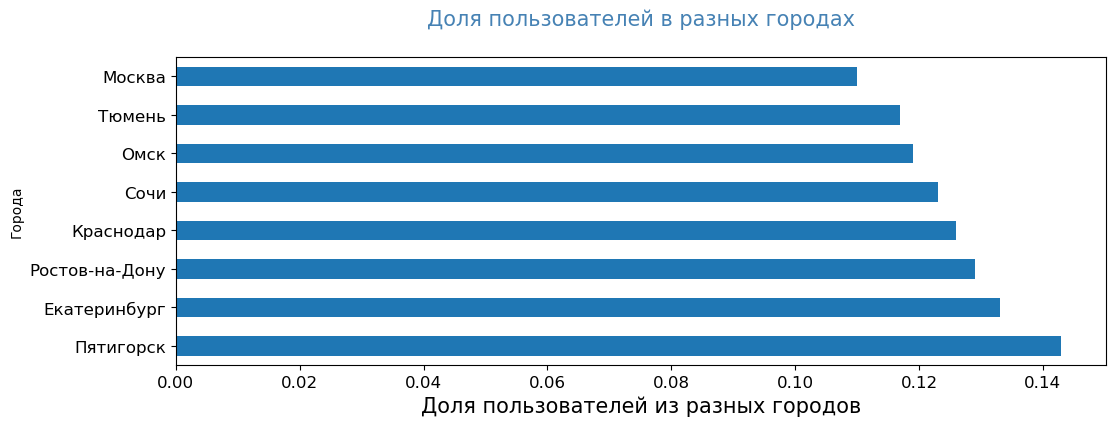

In [10]:
users_grouped_rate = users_grouped.drop('count', axis = 1)
users_grouped_rate.sort_values(by = 'rate', ascending = False)\
        .plot(kind = 'barh', figsize = (12,4), rot = 0, legend = False, fontsize = 12)
plt.title('Доля пользователей в разных городах' + "\n", fontsize=15, color='SteelBlue')
plt.xlabel('Доля пользователей из разных городов', fontsize=15)
plt.ylabel('Города')

Как видно из таблицы и графика, минимальное число пользователей - в Москве (168 или 11% от общего числа), максимальное - в Пятигорске (219 или 14% от общего числа), в процентном соотношении пользователи распределены равномерно, нет перекосов в сторону какого-то города.

Сделаем визуализацию с помощью value_counts() и построим график, где будет не доля пользователей в каждом городе, а количество

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64


Text(0, 0.5, 'Города')

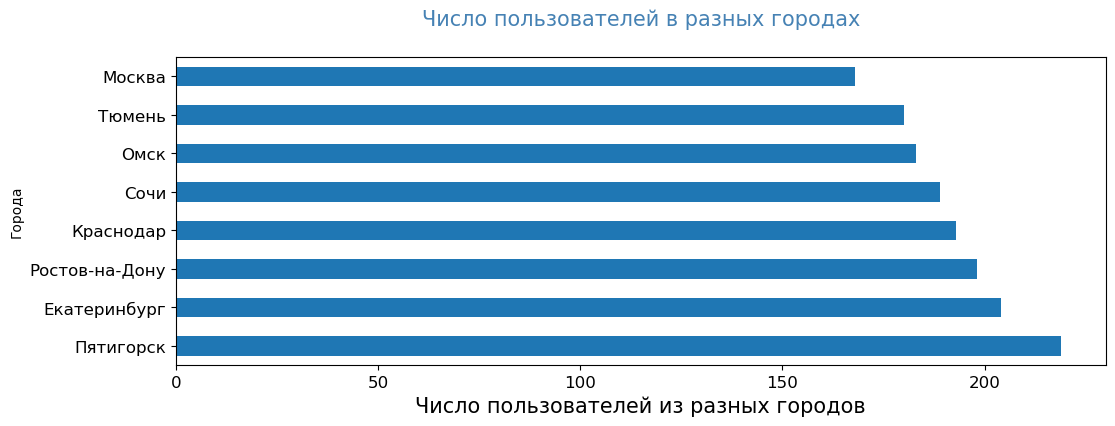

In [11]:
print(users['city'].value_counts())
users['city'].value_counts().plot(kind = 'barh', figsize = (12,4), rot = 0, legend = False, fontsize = 12)
plt.title('Число пользователей в разных городах' + "\n", fontsize=15, color='SteelBlue')
plt.xlabel('Число пользователей из разных городов', fontsize=15)
plt.ylabel('Города')

Посмотрим соотношение пользовталей с подпиской и без. Сделаем два варианта графиков. Мне удобнее смотреть столбчатые диаграммы, но в данном случае так же корректно использовать круговую диаграмму для наглядности.

                   user_id
subscription_type         
free                   835
ultra                  699


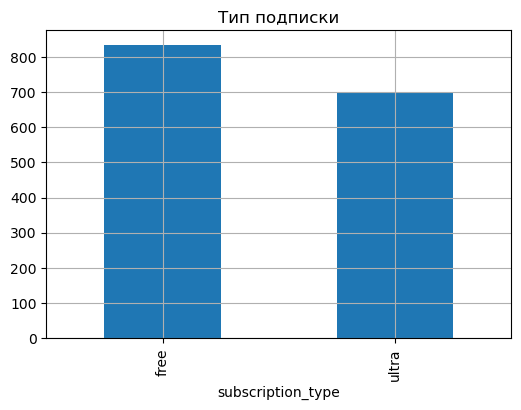

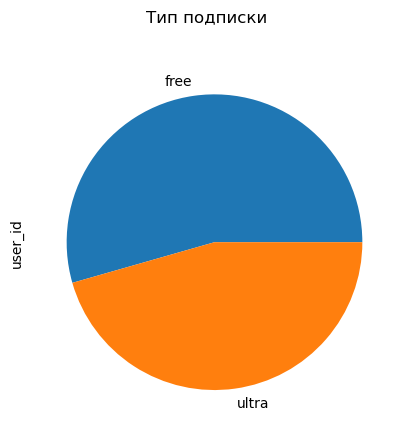

In [12]:
print(users.pivot_table(index='subscription_type', values='user_id', aggfunc = 'count'))
users.pivot_table(index='subscription_type', values='user_id', aggfunc = 'count').plot( title='Тип подписки', figsize=(6,4), kind='bar', grid = True, legend = False)
plt.show()
users.pivot_table(index='subscription_type', values='user_id', aggfunc = 'count').plot( title='Тип подписки', kind='pie', subplots=True, legend = False)
plt.show()

Из таблицы и графика видим, что чуть больше половины клиентов (54,4% или 835 человек) пользуются сервисом без подписки, и чуть меньше половины (45,6% или 699 человек) купили подписку.

Смотрим возраст пользователей.

     user_id
age         
12         4
13         8
14         9
15        13
16        19
17        26
18        46
19        47
20        71
21        93
22       119
23       129
24       132
25       145
26       131
27       119
28       112
29        68
30        68
31        48
32        41
33        39
34        19
35        15
36         6
37         2
38         3
39         1
43         1


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

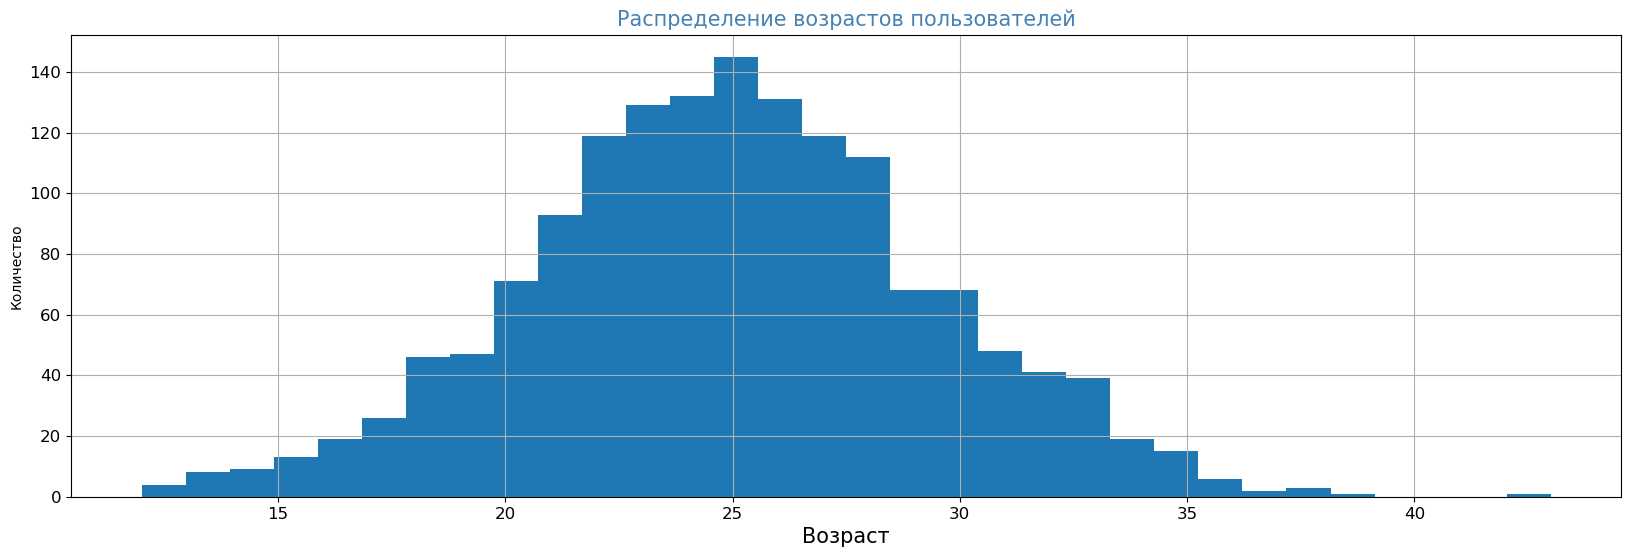

In [13]:
print(users.pivot_table(index = 'age', values = 'user_id', aggfunc = 'count'))
users['age'].plot(kind = 'hist', bins = 32, figsize = (20,6), grid = True, rot = 0, legend = False, fontsize = 12)
plt.title('Распределение возрастов пользователей', fontsize=15, color='SteelBlue')
plt.xlabel('Возраст', fontsize=15)
plt.ylabel('Количество')

users['age'].describe()

Видим, что возраст пользователей имеет  близкое к нормальному распределение. Больше всех катаются 25-летние, более половины пользователей возраста 20-30 лет (68% данных находятся в диапазоне одной сигмы в обе стороны от центра распределения, по расчетам и по графику видно, что это как раз интервал 20-30 лет). Реже всех катаются люди в возрасте до 16 лет и старше 35 лет.

Проанализируем расстояния поездок.

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

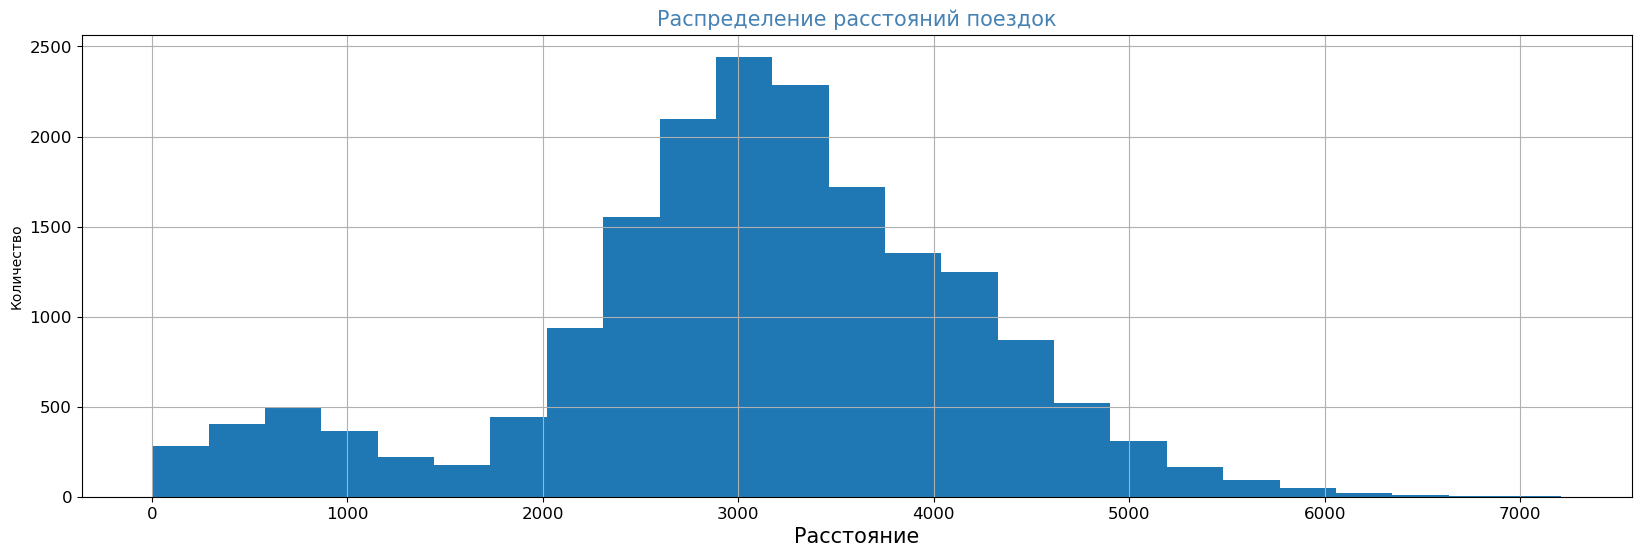

In [12]:
rides['distance'].plot(kind = 'hist', bins = 25, figsize = (20,6), grid = True, rot = 0, legend = False, fontsize = 12)
plt.title('Распределение расстояний поездок', fontsize=15, color='SteelBlue')
plt.xlabel('Расстояние', fontsize=15)
plt.ylabel('Количество')
rides['distance'].describe()

Из графика видим, что большая часть поездок имеет интервал расстояний от 2 до 5 км, самая распространенная дистанция - около 3 км. Есть небольшой пик коротких поездок расстоянием ~ 800 м, это, скорее всего, короткие, но срочные поездки в ближайший магазин, в садик за ребенком и тп. Разберемся с аномально короткими поездками. Посмотрим 5% процентиль.

In [13]:
rides['distance'].quantile(0.05)

689.0072786504327

Видим достаточно большое количество таких коротких поездок длиной менее 689 м, 5% от общего числа. Нельзя списать это на аномалии, сложно предположить, чем обусловлены такие короткие поездки, но избавиться от этих данных мы не можем, т к 5% - это существенная часть. Посмотрим 1,5% процентиль.

In [14]:
rides['distance'].quantile(0.015)

281.09102623863265

В проекте не стоит задачи избавиться от аномалий, поэтому оставим слишком короткие поездки, чтобы учесть всю выручку.

Проанализируем продолжительность поездок.

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

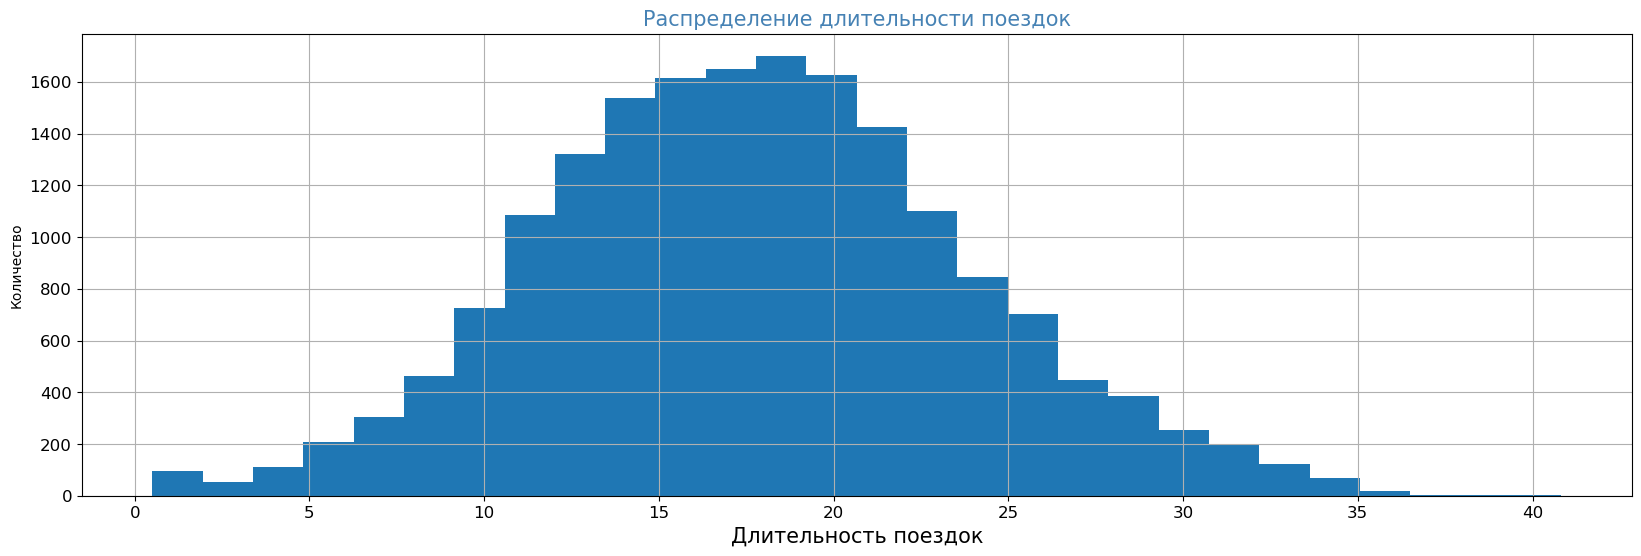

In [15]:
rides['duration'].plot(kind = 'hist', bins = 28, figsize = (20,6), grid = True, rot = 0, legend = False, fontsize = 12)
plt.title('Распределение длительности поездок', fontsize=15, color='SteelBlue')
plt.xlabel('Длительность поездок', fontsize=15)
plt.ylabel('Количество')
rides['duration'].describe()

Видим обычное нормальное распределение времени поездок, самая распространенная длительность - 17,8 минут. Примерно 95% поездок имеют длительность от 7 до 30 минут. Максимальную длительность 40 минут нельзя считать аномалией - долго, но такая длительность вполне возможна. На графике видим поездки длительностью менее 2 минут с небольшим, но ощутимым числом пользователей. Посмотрим число таких аномально коротких поездок. Выделим поездки длительностью равной и менее 2 минут и посчитаем их количество.

In [16]:
rides_duration_anomaly = rides.loc[rides['duration']<=2]
print(rides_duration_anomaly)
print(rides_duration_anomaly['duration'].value_counts())

       user_id     distance  duration       date  month
6531       701  4196.445201       0.5 2021-08-31      8
6570       704  4830.824371       0.5 2021-10-14     10
6680       712  4684.004397       0.5 2021-03-04      3
6695       713  5215.642710       0.5 2021-02-25      2
6768       718  5197.436649       0.5 2021-02-11      2
...        ...          ...       ...        ...    ...
17004     1460  5531.335845       0.5 2021-01-19      1
17242     1477  6724.932981       0.5 2021-01-12      1
17314     1483  4445.481070       0.5 2021-03-06      3
17505     1496  5722.551787       0.5 2021-02-14      2
17909     1524  4103.998874       0.5 2021-06-18      6

[95 rows x 5 columns]
duration
0.5    95
Name: count, dtype: int64


Мы нашли 95 поездок длительностью 0,5 минут. Поскольку длительность считается автоматически, нельзя списать это на человеческий фактор. Судя по расстояниям этих поездок (они достаточно большие - 4-5-6 км), это не ошибки (когда поехал и передумал/вернулся домой/что-то забыл и отменил поездку), а поездки с бесплатными минутами, которые могут быть результатом какой-то акции. Оставим эти поездки, т к они значимы для расчета статистики по расстояниям поездок.

**Выводы по исследовательскому анализу данных:**

***1)*** Минимальное число пользователей - в Москве (168 или 11% от общего числа), максимальное - в Пятигорске (219 или 14% от общего числа), в процентном соотношении пользователи распределены равномерно, нет перекосов в сторону какого-то города.

***2)*** Чуть больше половины клиентов (54,4% или 835 человек) пользуются сервисом без подписки, и чуть меньше половины (45,6% или 699 человек) оформили подписку.

***3)*** Возраст пользователей имеет близкое к нормальному распределение. Больше всех катаются 25-летние, более половины пользователей возраста 20-30 лет (68% данных находятся в диапазоне одной сигмы в обе стороны от центра распределения, по расчетам и по графику видно, что это как раз интервал 20-30 лет). Реже всех катаются люди в возрасте до 16 лет и старше 35 лет.

***4)*** Большая часть поездок имеет интервал расстояний от 2 до 5 км, самая распространенная дистанция - около 3 км. Есть небольшой пик коротких поездок расстоянием ~ 800 м, это, скорее всего, короткие, но срочные поездки (в магазин, садик, школу и пр).

***5)*** Самая распространенная длительность поездок - 17,8 минут. Примерно 95% поездок имеют длительность от 7 до 30 минут. Обнаружились 95 поездок длительностью 0,5 минут. Судя по расстояниям этих поездок (4-5-6 км), это не ошибки, а поездки с бесплатными минутами, которые могут быть результатом какой-то акции.

#### Шаг 4. Объединение данных

Объединим таблицы rides, users и subscriptions методом merge().

In [14]:
#Используем параметр how='inner', но это не обязательно, тк в обоих датафреймах нет пропусков.
users_rides = users.merge(rides, on = 'user_id', how = 'inner')
data_united = users_rides.merge(subscriptions, on = 'subscription_type')
display(data_united.head())


,index,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,0,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,0,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,0,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,0,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [15]:
print('Число строк в обеих таблицах до объединения', len(users)+len(rides))
print('Число строк после объединения', len(data_united))

Число строк в обеих таблицах до объединения 19602
Число строк после объединения 18068


Число строк в таблице, полученной в результате объединения трех таблиц, совпадает с числом строк в таблице поездок rides. Это правильно, потому что в результате объединения к каждой строке из датафрейма rides просто добавляется информация о пользователе из датафрейма users (город, имя, возраст) и тип подписки из subscriptions. Проще говоря, мы дополнили таблицу rides, и теперь кроме user_id (которая была общей в таблицах users и rides) в строки добавилась другая информация о пользователях и еще тип подписки (free или ultra), новых строк прибавиться не должно.

Создадим 2 таблицы: пользователи с подпиской и пользователи без подписки.

In [16]:
data_ultra = data_united.loc[data_united['subscription_type'] == 'ultra']
display(data_ultra.head())
data_free = data_united.loc[data_united['subscription_type'] == 'free']
display(data_free.head())

,index,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,0,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,0,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,0,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,0,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


,index,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,699,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,699,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,699,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,699,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,699,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


Проверим, не потерялась ли информация после разделения таблиц на 2 с разными категориями пользователей.

In [17]:
print('Сумма строк двух таблиц после разделения: ', len(data_ultra)+len(data_free))

print('Сумма строк исходной таблицы до разделения: ', len(data_united))

Сумма строк двух таблиц после разделения:  18068
Сумма строк исходной таблицы до разделения:  18068


Сравним данные по расстояниям у пользователей без подписки и с подпиской. Построим гистограммы распределения расстояний и посчитаем основные показатели.

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

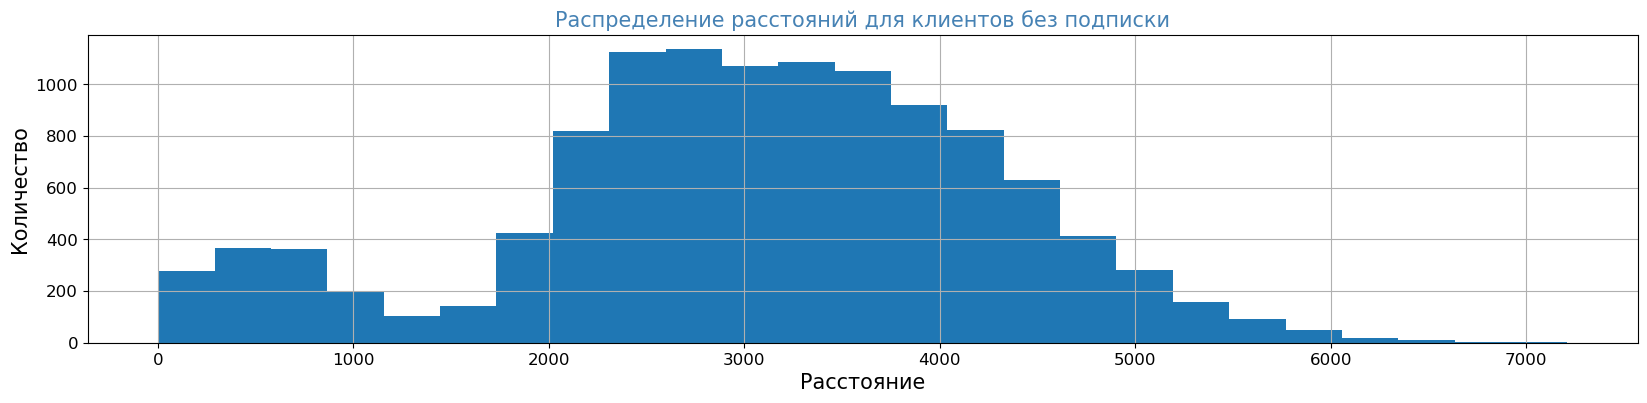

In [18]:
data_free['distance'].plot(kind = 'hist', bins = 25, figsize = (20,4), grid = True, rot = 0, legend = False, fontsize = 12)
plt.title('Распределение расстояний для клиентов без подписки', fontsize=15, color='SteelBlue')
plt.xlabel('Расстояние', fontsize=15)
plt.ylabel('Количество', fontsize=15)
data_free['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

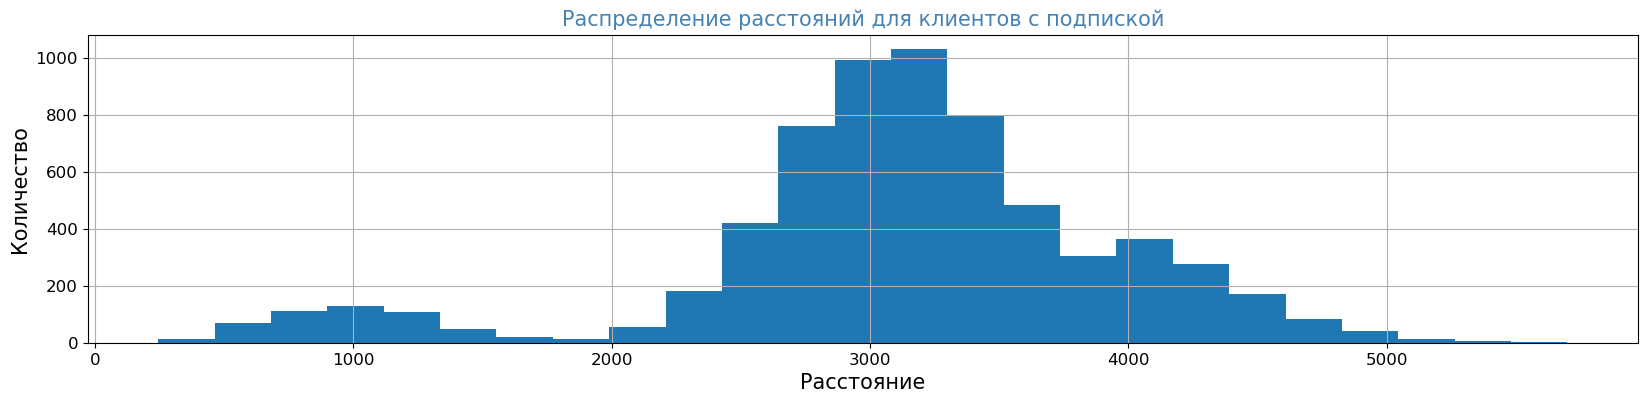

In [19]:
data_ultra['distance'].plot(kind = 'hist', bins = 25, figsize = (20,4), grid = True, rot = 0, legend = False, fontsize = 12)
plt.title('Распределение расстояний для клиентов c подпиской', fontsize=15, color='SteelBlue')
plt.xlabel('Расстояние', fontsize=15)
plt.ylabel('Количество', fontsize=15)
data_ultra['distance'].describe()

Средние показатели (среднее, медиана) у обеих категорий пользователей отличаются не значительно. Медианное значение длительности поезок составляет 3,11 и 3,15 км для пользователей без подписки и с подпиской соответственно. У пользователей без подписки больше разброс значений (сигма равны 1,25 км и 0,8 км для пользователей без подписки и с подпиской). Среди пользователей без подписки больше клиентов, передвигающихся на более далекие расстояния: максимальное расстояние у клиентов без подписки превышает 7 км и ощутимо много пользователей, ездящих на расстояние более 4,5 км. Среди пользователей с подпиской максимальное расстояние равно 5,7 км, и пользователи, передвигающиеся на расстояния более 4,5 км - редкость. У пользователей без подписки видим достаточно ощутимое количество поездок на слишком короткие расстояния менее 0,5 км, сложно объяснить это, т к старт поездки у этой категории платный. У пользователей с подписокй число аномально коротких поездок не существенно, и виден небольшой пик поездок на расстояния 1 км - то объясняется срочными короткими поездками на близкие расстояния (в ближайший магазин, пункт доставки и тд).

Посмотрим гистограммы для длительности поездок у обеих категорий пользователей.

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

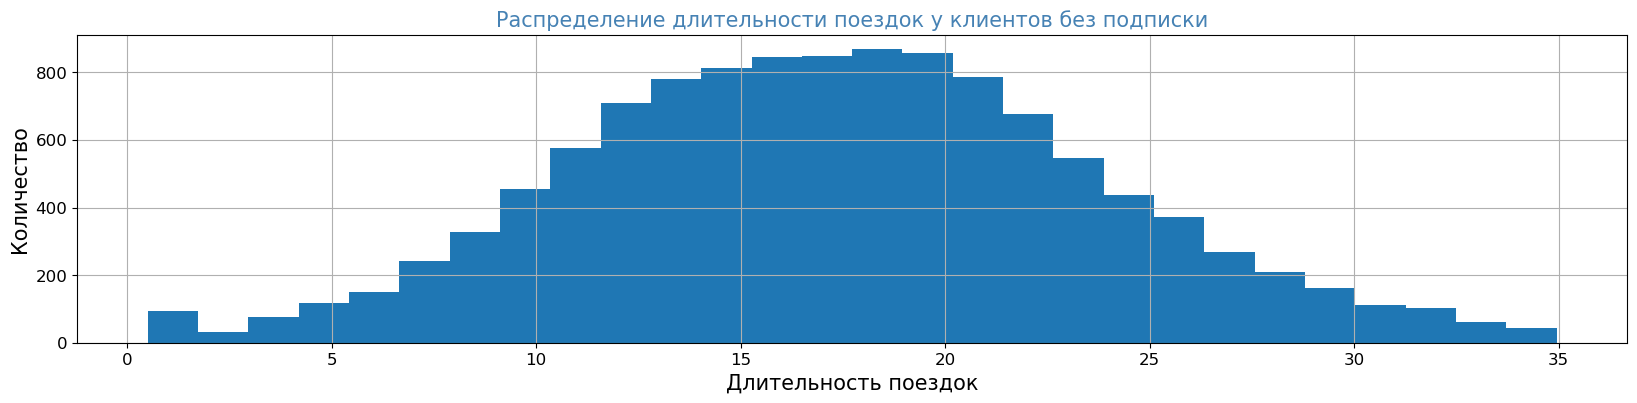

In [20]:
data_free['duration'].plot(kind = 'hist', bins = 28, figsize = (20,4), grid = True, rot = 0, legend = False, fontsize = 12)
plt.title('Распределение длительности поездок у клиентов без подписки', fontsize=15, color='SteelBlue')
plt.xlabel('Длительность поездок', fontsize=15)
plt.ylabel('Количество', fontsize=15)
data_free['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

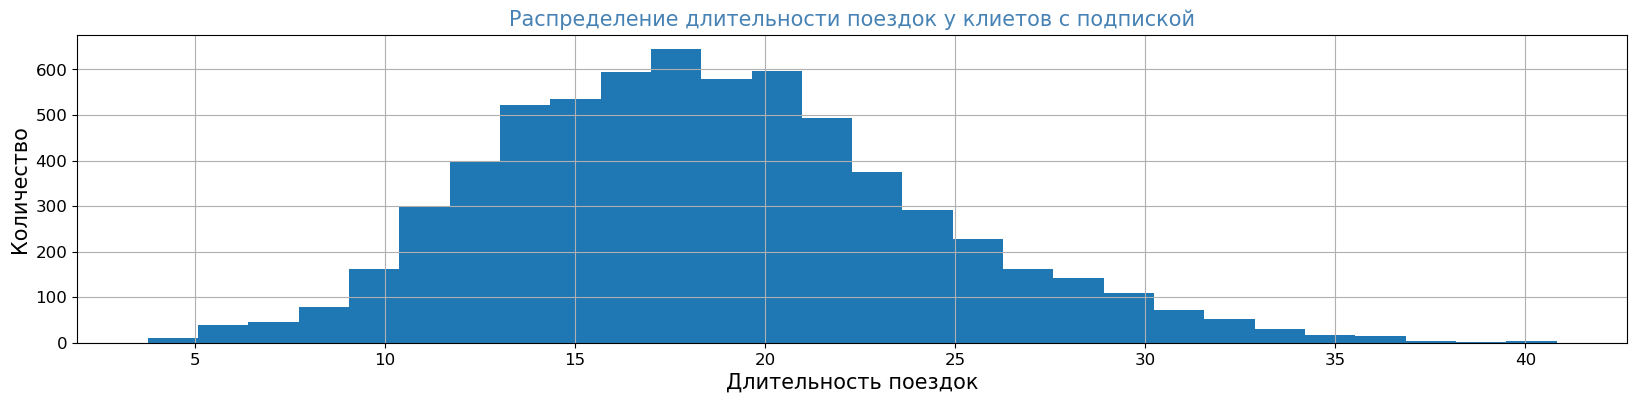

In [21]:
data_ultra['duration'].plot(kind = 'hist', bins = 28, figsize = (20,4), grid = True, rot = 0, legend = False, fontsize = 12)
plt.title('Распределение длительности поездок у клиетов с подпиской', fontsize=15, color='SteelBlue')
plt.xlabel('Длительность поездок', fontsize=15)
plt.ylabel('Количество', fontsize=15)
data_ultra['duration'].describe()


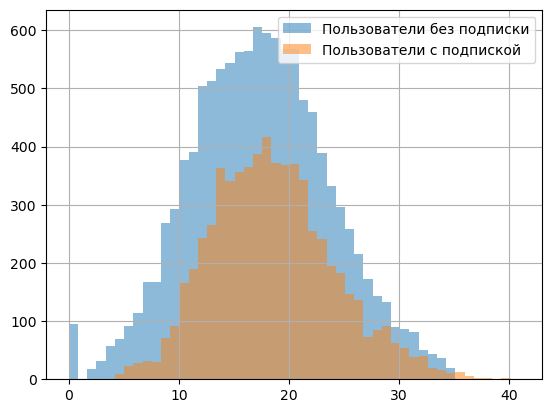

In [22]:
x = [data_free['duration']]
y = [data_ultra['duration']]

bins = numpy.linspace(0, 41)

pyplot.hist(x, bins, alpha=0.5, label='Пользователи без подписки')
pyplot.hist(y, bins, alpha=0.5, label='Пользователи с подпиской')
pyplot.legend(loc='upper right')
plt.rcParams["figure.figsize"] = (20, 6)
plt.grid() 
pyplot.show()

Среднее и медианное значения для обеих категорий пользователей отличаются не значительно. Средняя длительность поездки составляет 17,6 минут у клиентов без подписки и 18,2 минут у клиентов с подпиской. 75% клиентов обеих категорий ездят не дольше 22 минут (75% квартиль у обеих категорий одинаковый), разброс значений тоже отличается не значительно. Отличие только в том, что у клиентов с подпиской чуть больше максимальная длина поездок: 40 минут, в то время как у пользователей бех подписки максимально долгая поездка 35 минут.

#### Шаг 5. Подсчёт выручки

Создадим таблицу с агрегированными данными о поездках, в качестве индекса будем использовать месяц и идентификатор (user id) пользователей, посчитаем общее расстояние и общую длительность поездок по каждому пользователю.

In [23]:
data_united['duration'] = np.ceil(data_united['duration']) 
data_income = data_united.pivot_table(
                           index=['month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': 'sum', 
                                      'duration' : 'sum', 
                                      'name' : 'count', 
                                      'subscription_type' : 'min'})
data_income.columns = ['total_distance', 'total_duration', 'count_trips', 'subscription_type']
display(data_income.head())

total_distance  total_duration  count_trips subscription_type
month user_id                                                               
1     1           7027.511294            42.0            2             ultra
      3           3061.777147            13.0            1             ultra
      5           3914.646990            13.0            1             ultra
      7           6478.080979            28.0            2             ultra
      12          3577.151148            33.0            1             ultra

Добавим столбец с помесячной выручкой, которую принёс каждый пользователь.

In [24]:
def month_income(row):
    if row['subscription_type'] =='free':
        return 50*row['count_trips']+8*row['total_duration']
    if row['subscription_type'] =='ultra':
        return 199+6*row['total_duration']
    
data_income['income_per_month'] = data_income.apply(month_income, axis = 1)

display(data_income.head())

total_distance  total_duration  count_trips subscription_type  \
month user_id                                                                  
1     1           7027.511294            42.0            2             ultra   
      3           3061.777147            13.0            1             ultra   
      5           3914.646990            13.0            1             ultra   
      7           6478.080979            28.0            2             ultra   
      12          3577.151148            33.0            1             ultra   

               income_per_month  
month user_id                    
1     1                   451.0  
      3                   277.0  
      5                   277.0  
      7                   367.0  
      12                  397.0

#### Шаг 6. Проверка гипотез

***6.1*** 

Проверим гипотезу о том, тратят ли пользователи с подпиской больше времени на поездки, чем пользователи без подписки. Гипотеза правосторонняя, т к проверяется отклонение в одну (правую, бОльшую) сторону.

***1)*** Нулевая гипотеза: "Пользователи с подпиской и пользователи без подписки тратят на поездки в среднем одинаковое количество времени".

***2)*** Альтернативная гипотеза: "Пользователи с подпиской тратят на поездки больше времени". 

В качестве первого массива возьмем столбец длительностей (duration) из таблицы data_ultra (пользователи с подпиской), в качестве второго массива возьмем столбец длительностей (duration) из таблицы data_free (пользователи без подписки). Мы сравниваем данные из первой и второй выборок и в альтернативной гипотезе предполагаем, что среднее выборочное из первого массива больше, поэтому гипотеза правосторонняя. Среднеквадратические отклонения двух выборок отличаются не значительно: 5,55 минут у пользователей с подпиской и 5,97 минут у пользователей без подписки (данные рассчитаны в тех же ячейках, что гистограммы распределения длительности поездок). Поэтому при расчете примем equal_var = True. 

In [25]:
duration_ultra = data_ultra['duration']
duration_free = data_free['duration']

alpha = 0.05

print(f'Средняя длительность поездки у пользователей с подпиской: {np.mean(duration_ultra)}')
print(f'Средняя длительность поездки упользователей без подписки: {np.mean(duration_free)}')

results = st.ttest_ind(duration_ultra, duration_free, equal_var = True, alternative = 'greater')

print(f'p-value равно {results.pvalue}')

#вывод об отвержении или неотвержении нулевой гипотезы:
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу.')
if results.pvalue>alpha:
    print('Не получилось отвергнуть нулевую гипотезу.')


Средняя длительность поездки у пользователей с подпиской: 18.54198516280583
Средняя длительность поездки упользователей без подписки: 17.39090929866399
p-value равно 1.2804098316645618e-34
Отвергаем нулевую гипотезу.


Мы получили P-value равное 2,89*10^(-14), это значит, что вероятность случайно получить среднее во второй выборке, равное среднему из первой выборки, ничтожно мала (при условии, что нулевая гипотеза верна). Отвергаем нулевую гипотезу и делаем вывод, что у пользователей с подпиской среднее время поездки больше.

***6.2***

Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
Предположим, что среднее расстояние которое проезжают пользователи с подпиской РАВНО 3130 метров.
Вопрос "Не превышает ли среднее расстояние 3130 м?" можно перефразировать так: "Можно ли сказать, что среднее расстояние меньше или равно 3130 м?" Нас устроят два варианта: среднее время равно 3130 м и среднее время меньше 3130 м. Поэтому проверим правостороннюю гипотезу (среднее расстояние больше 3130м). Если в результате теста придется принять правую гипотезу (среднее расстояние больше 3130 м), то нельзя будет ответить на поставленный вопрос утвердительно. Если нулевую гипотезу нельзя будет отвергнуть, ответим на вопрос положительно. 

***Нулевая гипотеза:*** "Среднее расстояние, которое проезжают пользователи с подпиской, равно 3130 м".

***Альтернативная гипотеза:*** "Среднее расстояние, которое проезжают пользователи с подпиской, больше 3130 м".

In [26]:
distance_ultra = data_ultra['distance']
distance_free = data_free['distance']

alpha = 0.05

print(f'Среднее расстояние поездки пользователей с подпиской: {np.mean(distance_ultra)}')
print(f'Среднее расстояние поездки пользователей без подписки: {np.mean(distance_free)}')

results_distance = st.ttest_ind(distance_ultra, distance_free, equal_var = True, alternative = 'greater')

print(f'p-value равно {results_distance.pvalue}')

#вывод об отвержении или неотвержении нулевой гипотезы:
if results_distance.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
if results_distance.pvalue > alpha:
    print('Не получилось отвергнуть нулевую гипотезу.')

Среднее расстояние поездки пользователей с подпиской: 3115.4453880370247
Среднее расстояние поездки пользователей без подписки: 3045.495281671816
p-value равно 2.6587726976606563e-05
Отвергаем нулевую гипотезу.


Высокая p-value говорит о том, что вероятность получить значение, большее, чем во второй выборке (пользователи без подписки), обусловлена случайностью. Значит, среднее во второй выборке (среднее расстояние поездки у пользователей без подписки) в большинстве случаев близко к среднему в первой выборке (пользователи с подпиской).

Мы не можем отказаться от нулевой гипотезы в сторону правосторонней, поэтому можно сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 м.

***6.3*** 

Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 
Создадим две таблицы, в которых будет собрана выручка по месяцам, в первой таблице  - выручка пользователей с подпиской, во второй - без подписки.

In [27]:
#Создадим таблицу, в которой будет выручка по месяцам только по пользователям с подпиской.
income_ultra = data_income.loc[data_income['subscription_type'] == 'ultra'] 
display(income_ultra.head(10))

total_distance  total_duration  count_trips subscription_type  \
month user_id                                                                  
1     1           7027.511294            42.0            2             ultra   
      3           3061.777147            13.0            1             ultra   
      5           3914.646990            13.0            1             ultra   
      7           6478.080979            28.0            2             ultra   
      12          3577.151148            33.0            1             ultra   
      13          6687.987446            42.0            2             ultra   
      14          7699.643820            35.0            2             ultra   
      15          4187.621459            39.0            1             ultra   
      20          3516.719208            29.0            1             ultra   
      22          3058.692225            13.0            1             ultra   

               income_per_month  
month user_id                    
1     1                   451.0  
      3                   277.0  
      5                   277.0  
      7                   367.0  
      12                  397.0  
      13                  451.0  
      14                  409.0  
      15                  433.0  
      20                  373.0  
      22                  277.0

In [28]:
#Создадим таблицу, в которой будет выручка по месяцам только по пользователям без подписки.
income_free = data_income.loc[data_income['subscription_type'] == 'free'] 
display(income_free.head(10))

total_distance  total_duration  count_trips subscription_type  \
month user_id                                                                  
1     700         2515.690719            15.0            1              free   
      701         2676.472894            18.0            1              free   
      702          903.861985            16.0            1              free   
      703         3406.580225            24.0            1              free   
      704         3197.139639            18.0            1              free   
      706         7443.193197            37.0            2              free   
      707         7857.433223            44.0            2              free   
      709         3368.357750            25.0            1              free   
      711         9508.637968            61.0            3              free   
      712         2235.247794            19.0            1              free   

               income_per_month  
month user_id                    
1     700                 170.0  
      701                 194.0  
      702                 178.0  
      703                 242.0  
      704                 194.0  
      706                 396.0  
      707                 452.0  
      709                 250.0  
      711                 638.0  
      712                 202.0

Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Исследуем значения в столбце выручки за месц (income_per_month).

***1) Нулевая гипотеза:*** Среднемесячная выручка от пользователей с подпиской равна среднемесячной выручке от пользователей без подписки.

***2) Альтернативная гипотеза:*** Среднемесячная выручка от пользователей с подпиской больше среднемесячной выручки от пользователей без подписки.

In [29]:
income_ultra_series = income_ultra['income_per_month']
income_free_series = income_free['income_per_month']

alpha = 0.05

results_income = st.ttest_ind(income_ultra_series, income_free_series, equal_var = False, alternative = 'greater')

print(f'p-value равно {results_income.pvalue}')

#вывод об отвержении или неотвержении нулевой гипотезы:
if results_income.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
if results_income.pvalue > alpha:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-value равно 8.874140893976874e-40
Отвергаем нулевую гипотезу.


Правосторонний тест показал: вероятность того, что мы случайно получим среднюю выручку у подписчиков равную средней выручке клиентов без подписки, стремится к нулю. Нулевую гипотезу отвергаем в пользу той, что среднемесячная выручка у клиентов с подпиской больше.

Попробуем проверить левостороннюю гипотезу: предположим, что среднемесячная выручка у подписчиков меньше, чем средняя у клиентов без подписки. 

***1) Нулевая гипотеза:*** Среднемесячная выручка от пользователей с подпиской равна среднемесячной выручке от пользователей без подписки.

***2) Альтернативная гипотеза:*** Среднемесячная выручка от пользователей с подпиской меньше среднемесячной выручки от пользователей без подписки.

Левосторонний тест говорит о том, что получение среднего значения у подписчиков, не меньшего, чем среднее значение второй выборки - это достоверность. В этом случае получается, что вероятность того, что средний показатель подписчиков будет меньше средней выручки не подписанных клиентов, равна нулю.

***6.4*** 

Если бы техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение, и надо было бы сравнить количество обращений в техподдержку до и после обновления серверов, в таком случае нужно было бы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок, применив метод scipy.stats.ttest_rel(). Первым параметром нужно было бы задать данные ПОСЛЕ обновления серверов, вторым параметром данные ДО обновления серверов, значение параметра alternative нужно было бы задать 'less', т к команда техподдержки надеется на то, что количество обращения снизится.

***Общий вывод:***

***1)*** Пользователи равномерно распределены по 8 городам, больше всего клиентов в Пятигорске (219 или 14% от общего числа), минимальное число пользователей - в Москве (168 или 11% от общего числа).

***2)*** 54,4% или 835 человек пользуются сервисом без подписки, и чуть меньше половины (45,6% или 699 человек) купили подписку.

***3)*** Наибольшей популярностью сервис пользуется у клиентов в возрасте 20-30 лет (около 70% клиентов этого возраста), люди младше 16 и старше 35 лет катаются редко.

***4)*** Дальность поездок у большинства пользователей варьируется от 2 до 5 км, самое "распространенное" расстояние - 3 км. У пользователей без подписки разброс значений расстояний больше, часто (по сравнению с подписчиками) встречаются поездки дальностью более 4,5 км, и также бывают слишком короткие поездки расстоянием менее 500 м

***5)*** Примерно 95% поездок имеют длительность от 7 до 30 минут. Чаще всего поездка длится 17-18 минут. У клиентов без подписки ощутимо много аномально коротких поездок (0,5 минуты), в то же время у этих поездок дальние (больше 4 км) расстояния. Предполагаем, что они были результатом рекламных или подарочных акций с бесплатными минутами.

***6)***  В результате теста мы приняли гипотезу о том, что у пользователей с подпиской среднее время поездки больше. Среднее время поездки отличается не значительно (менее 1 минуты).

***7)*** По итогам анализа средней длительности поездок у клиентов с подпиской можно сделать вывод, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 м, что является оптимальным для износа самоката.

***8)***  По итогам односторонних тестов приняли гипотезу о том, что среднемесячная выручка от пользователей с подпиской выше.